# 랜덤포레스트를 활용한 당뇨병 데이터 알아보기

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#폰트지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

In [37]:
# 데이터 로드
data = pd.read_csv('../dataSet/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [38]:
# 특성X와 타겟 y 분리

# 해당 축을 제외하겠다
X = data.drop('Outcome', axis=1)
y= data['Outcome']

In [39]:
# 데이터 전처리: 특성 스케일링
# 작은 값으로 전환
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [40]:
#데이터 분할
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [41]:
# 랜덤 포레스트 모델 생성 및 학습

# 전문트리 100개
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [42]:
# 예측
y_predict = rf_model.predict(X_test)

In [43]:
# 교차검증 수행

# 100개 데이터를 가지고 한다면 5개의 분류로 나눠서 한다는 것
cv_scores = cross_val_score(rf_model,X_scaled,y,cv=5)

In [44]:
# 특성 중요도 계산
feature_importance = pd.DataFrame({
    '특성':X.columns,
    '중요도':rf_model.feature_importances_
}).sort_values('중요도',ascending=False)

In [17]:
# 결과 출력
print('모델 성능 평가')
print('\n교차 검증 점수:')
print(f'평균 정확도: {cv_scores.mean():.4f} (+/- {cv_scores.std() *2:.4f})')
print('분류리포트')
print(classification_report(y_test,y_predict))

모델 성능 평가

교차 검증 점수:
평균 정확도: 0.7657 (+/- 0.0715)
분류리포트
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.62      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



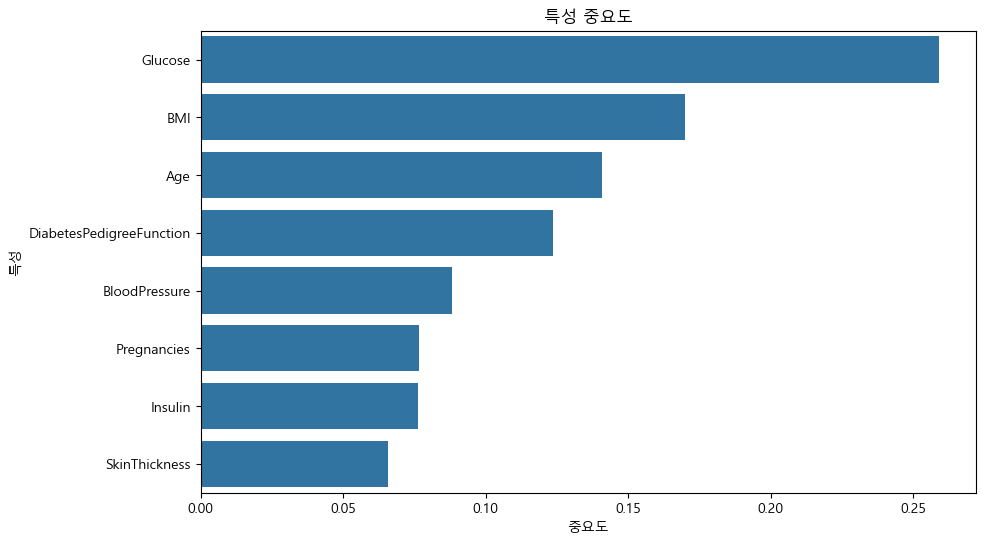

In [45]:
# 특성 중요도 시각화
plt.figure(figsize=(10,6))
sns.barplot(x='중요도',y='특성',data=feature_importance)
plt.title('특성 중요도')
plt.show()

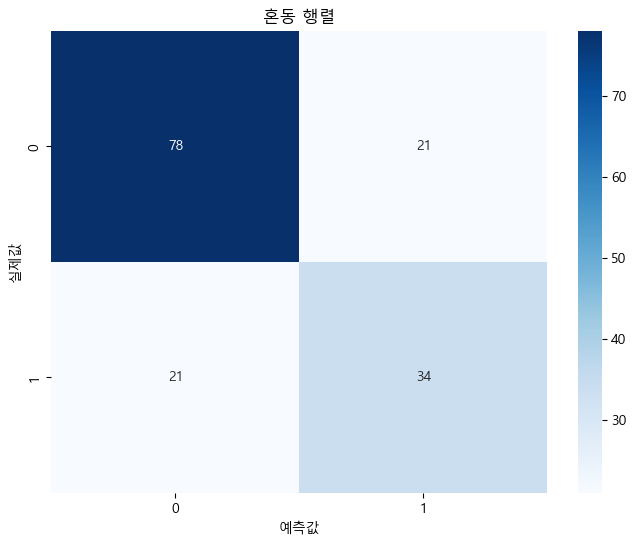

In [46]:
# 혼동 행렬 시각화
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('혼동 행렬')
plt.xlabel('예측값')
plt.ylabel('실제값')
plt.show()

In [25]:
# 새로운 환자 데이터로 예측 예시
print('\n새로운 환자 데이터 예측 예시')


새로운 환자 데이터 예측 예시


In [28]:
# 임의의 환자 데이터 생성
new_patient = X_test.iloc[0:1]
predict = rf_model.predict(new_patient)
predict_pro =rf_model.predict_proba(new_patient)
print(f"예측 결과: {'당요병 환자' if predict[0] == 1 else '정상'}")
print(f'당뇨병일 확률: {predict_pro[0][1]:.2%}')

예측 결과: 정상
당뇨병일 확률: 31.00%


In [29]:
# 예측 신뢰도 분석
threshold_probs = rf_model.predict_proba(X_test)
confidence_score = np.max(threshold_probs,axis=1)

findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
c:\study_python_3106\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\study_python_3106\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
c:\study_python_3


예측 신뢰도 분포:


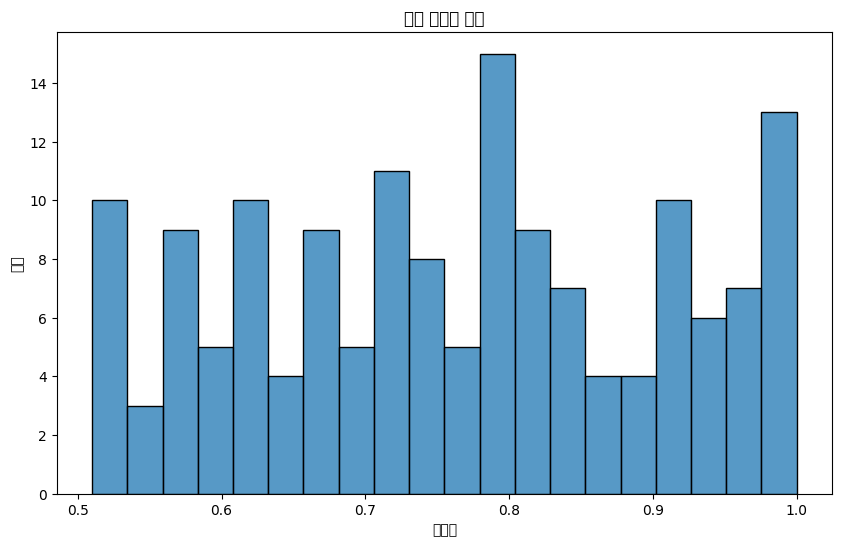

In [31]:
print('\n예측 신뢰도 분포:')
plt.figure(figsize=(10,6))
sns.histplot(confidence_score,bins=20)
plt.title('예측 신뢰도 분포')
plt.xlabel('신뢰도')
plt.ylabel('빈도')
plt.show()

# 보스톤 집값 분석 예제
### 컬럼 설명 ###
### CRIM(타운별 1인당 범죄울), ZN(25,000평방피트 주택이 차지하는 비율), INDUS(비소매 상업지역 면적비율)
### CHAS(찰스강 인접 여부), NOX(일산화질소 농도), RM(주택 1가구당 평균 방 개수), AGE(1940년대 이전 주택 비율)
### DIS(보스턴 고용 센터까지의 가중거리), TAX(10,000달러당 재산세율), PTRATIO(타운별 학생교사 비율)
### B(타운별 흑인인구 비율 계산식), LSTAT(하위 계층의 비율), MEDV(주택의 중간 가격)

In [1]:
# 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# 폰트지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

In [4]:
# 숫자가 지수표현식으로 나올 때 지정
pd.options.display.float_format='{:.2f}'.format

In [7]:
# 데이터 로드
data = pd.read_csv('../dataSet/HousingData.csv')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [9]:
# 결측값 확인 및 처리
print(data.isnull().sum())

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [11]:
# 결측값 처리
data = data.dropna()

In [13]:
# 결측값 처리 후 확인
print(data.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [14]:
# 주요 변수 선택
X= data[['CRIM','RM','TAX','LSTAT']]
y=data['MEDV']

In [15]:
# 데이터 분할
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
# 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [17]:
# 모델 평가
y_predict = model.predict(X_test)
mes = mean_squared_error(y_test,y_predict)
r2 = r2_score(y_test,y_predict)

In [19]:
print(f'mean squared Error: {mes}')
print(f'R2 Score: {r2}')

mean squared Error: 41.01145441904804
R2 Score: 0.5137736507938266


In [20]:
# 회귀 계수 출력
print(f'회귀 계수: {model.coef_}')
print(f'절편 : {model.intercept_}')

회귀 계수: [-0.08498347  5.59693339 -0.00824347 -0.42511164]
절편 : -3.831014747888208


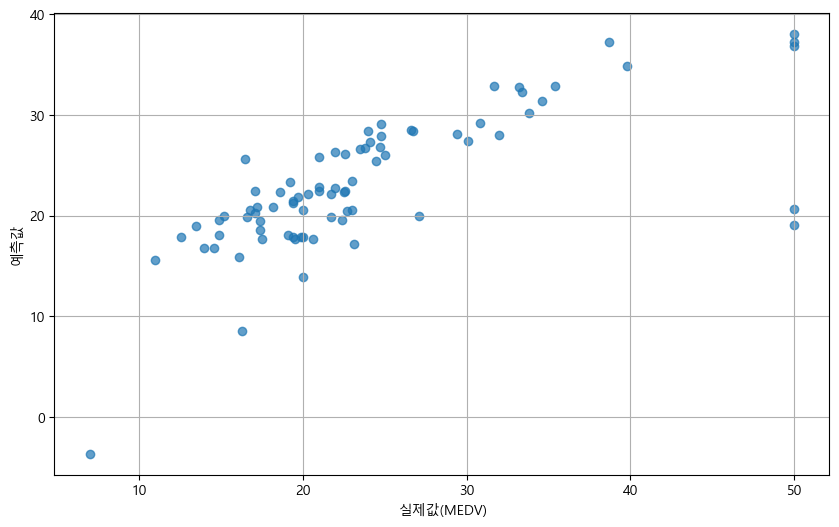

In [21]:
# 시각화
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_predict,alpha=0.7)
plt.xlabel('실제값(MEDV)')
plt.ylabel('예측값')
plt.grid()
plt.show()

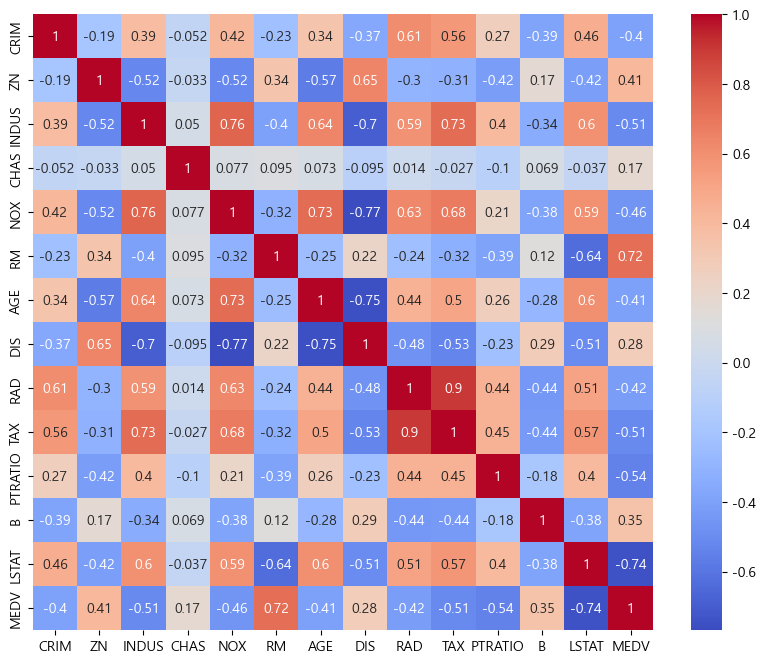

In [22]:
# 변수별 상관관계 히트맵
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.show()

# 랜덤포레스트 모델 활용한 예제 -> 다른 회귀모델 선을 비교


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [24]:
# 데이터 로드
data = pd.read_csv('../dataSet/HousingData.csv')

In [25]:
# 데이터 전처리-> 결측값 제거
data = data.dropna()
X=data[['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'TAX', 'LSTAT']]
y = data['MEDV']

In [26]:
# 데이터 분할
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
# 1.랜덤 포레스트 모델
rf_model = RandomForestRegressor(random_state=42,n_estimators=100)
rf_model.fit(X_train,y_train)
y_rf_predict = rf_model.predict(X_test)

In [28]:
# 랜덤 포레스트 평가
rf_mse = mean_squared_error(y_test,y_rf_predict)
rf_r2 = r2_score(y_test,y_rf_predict)
print(f'랜덤 포레스트 => MSE {rf_mse}, R2:{rf_r2}')

랜덤 포레스트 => MSE 28.62770027848102, R2:0.6605937928865708


In [29]:
# 2.다른 모델 비교
models ={
    'LinearRegression': LinearRegression(),
    'DecisionTreeRegressor':DecisionTreeRegressor(random_state=42)
}

In [30]:
results={}
for name, model in models.items():
    model.fit(X_train,y_train)
    y_predict =model.predict(X_test)
    mes = mean_squared_error(y_test,y_predict)
    r2 = r2_score(y_test,y_predict)
    results[name] = {"MSE":mes,"R2":r2}
    print(f'{name}=> MSE:{mes:.2f}, R2:{r2:.2f}')

LinearRegression=> MSE:36.34, R2:0.57
DecisionTreeRegressor=> MSE:27.30, R2:0.68


In [31]:
# 최적 모델 선택 및 시각화
results['Random Forest'] = {"MSE":rf_mse,"R2":rf_r2}
best_model = max(results, key=lambda x: results[x]['R2'])
print('\n 최적 모델:',best_model)


 최적 모델: DecisionTreeRegressor


In [32]:
# 결과 시각화
r2_score = [result['R2'] for result in results.values()]
model_names = list(results.keys())

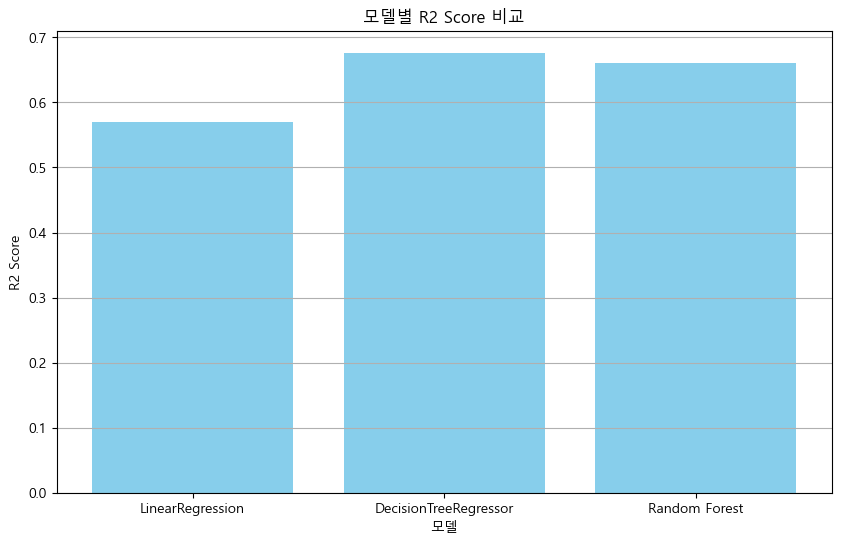

In [33]:
plt.figure(figsize=(10,6))
plt.bar(model_names,r2_score,color='skyblue')
plt.xlabel('모델')
plt.ylabel('R2 Score')
plt.title('모델별 R2 Score 비교')
plt.grid(axis='y')
plt.show()

In [34]:
# 랜덤 포레스트 하이퍼파라미터 튜닝 -> 옵션 선택
param_grid = {
    'n_estimators':[50,100,200],
    'max_depth': [None,10,20],
    'min_samples_split': [2,5,10]
}

In [ ]:
grid_search =GridSearchCV(estimator=RandomForestRegressor(random_state=42),param_grid=param_grid,cv=3,scoring='r2')
grid_search.fit(X_train,y_train)